In [1]:
from importlib import reload

In [2]:
import utils
reload(utils)
from utils import *

Достаём из базы данных дневные и месячные сессии. Вдальнейшем будем работать только с месячными.

In [3]:
df_daily, df_monthly = read_data("trade_info.sqlite3")

Группируем сессии по session_id и строим для них векторные представления путём дискретизации

In [4]:
groups = group_by_sesion_id(df_monthly)
vecs = vectorize_groups(groups)

Далее кластеризуем сессии с использованием разных метрик алгоритмом AgglomerativeClustering.
На графике разными цветами обозначены сессии, отнесенные к разным кластерам.

/Users/myutman/opt/anaconda3/envs/HW2/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


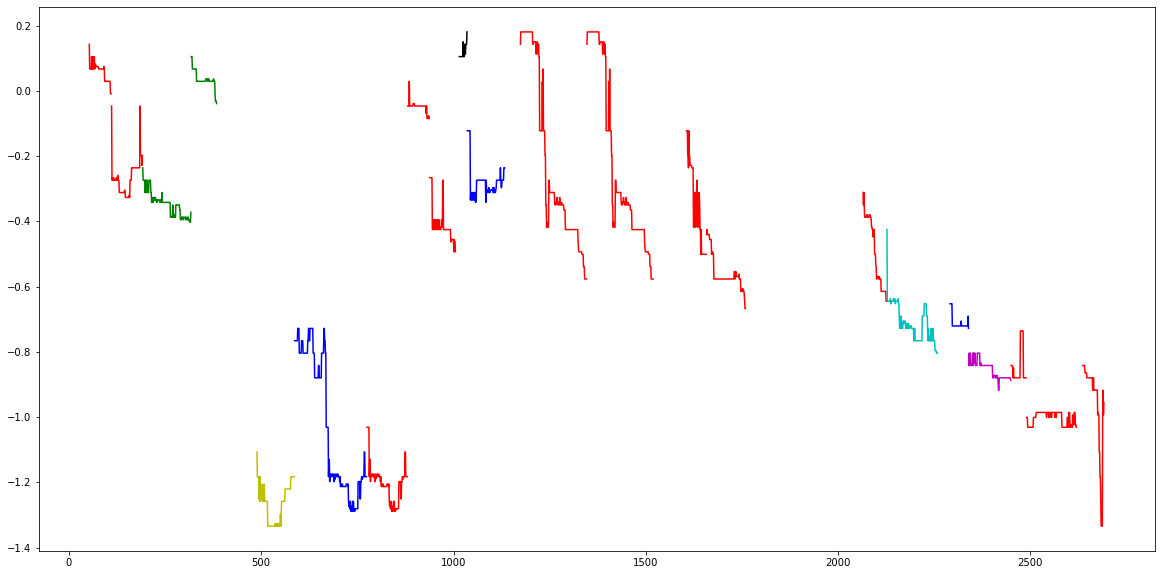

In [5]:
from tslearn.metrics import dtw

clusters = build_clusters(n_clusters=8, vecs=vecs, dist=dtw)
fig = show_clusters(groups, clusters)

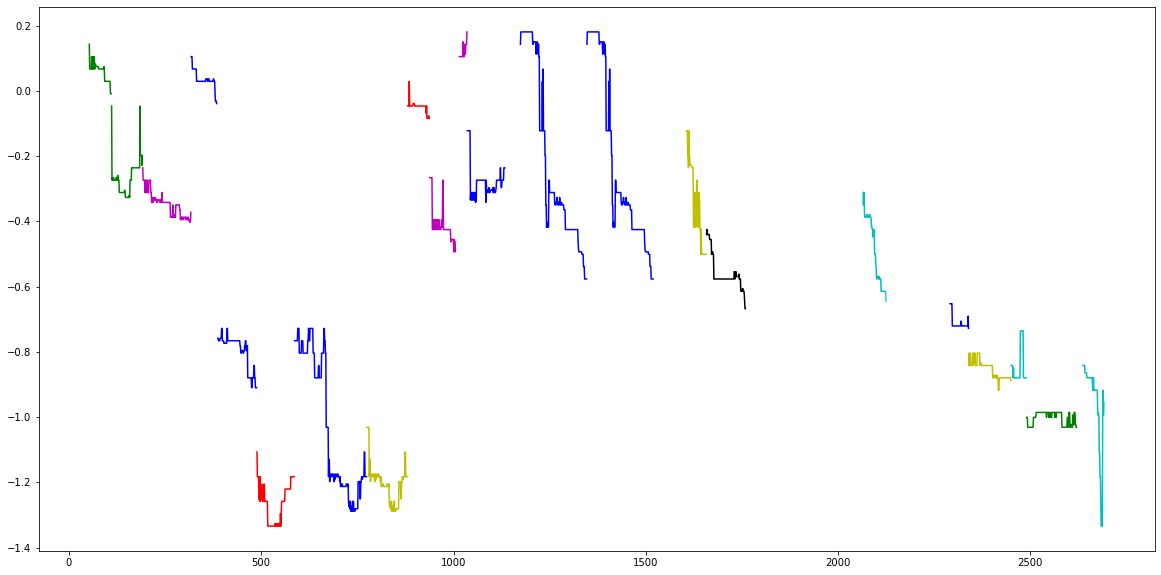

In [6]:
from sklearn.metrics.pairwise import cosine_distances as cosine

clusters = build_clusters(n_clusters=8, vecs=vecs, dist=lambda x, y: cosine([x], [y])[0][0])
fig = show_clusters(groups, clusters)

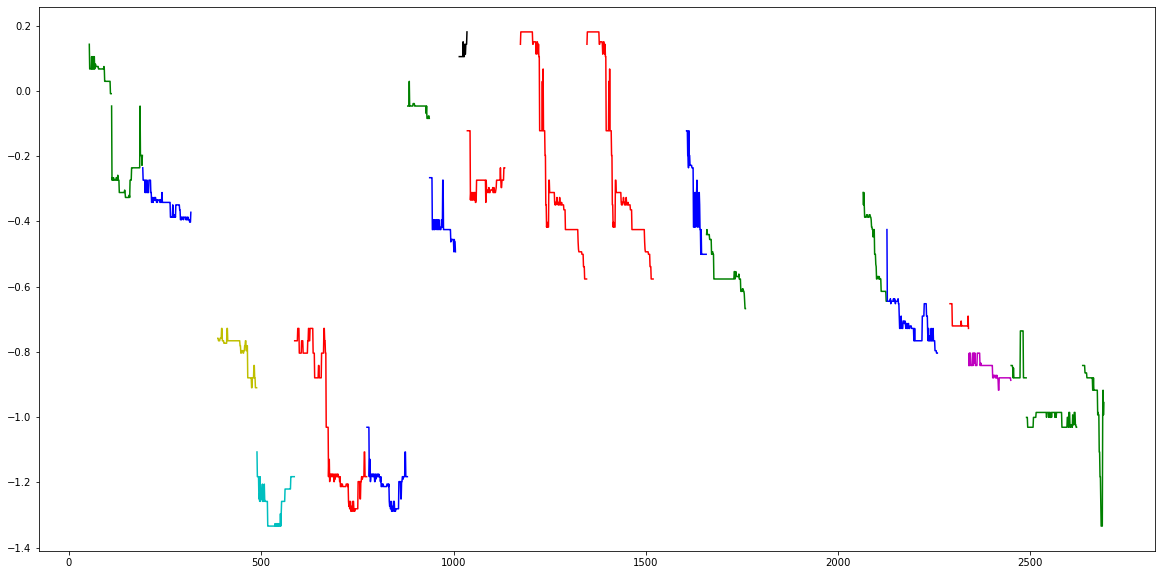

In [7]:
from sklearn.metrics import mean_absolute_error as mae

clusters = build_clusters(n_clusters=8, vecs=vecs, dist=mae)
fig = show_clusters(groups, clusters)